## House Price Prediction

1. Problem Statement
2. Data Source
3. Check dataset
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Select Best Model

### 1. Problem Statement
- In this dataset, we analyze how house price changes in different geographic region in California district by the variables such as longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity

### 2. Data Source
- Data Source: https://www.kaggle.com/datasets/camnugent/california-housing-prices
- The dataset 20640 records and 10 columns

#### Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data

In [2]:
df = pd.read_csv('data/housing.csv')

#### Show Top 5 Records

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Show Last 5 Records

In [10]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


#### Show number of rows and columns

In [4]:
df.shape

(20640, 10)

#### Columns Description

- longitude: A measure of how far west a house is; a higher value is farther west
- latitude: A measure of how far north a house is; a higher value is farther north
- housingMedianAge: Median age of a house within a block; a lower number is a newer building
- totalRooms
- totalBedrooms
- population: number of people live in a neighbourhood
- households: Total number of households, a group of people live in a home unit, for a block
- medianIncome: Median income for households (Median Income in tens of thousands of US Dollars)
- medianHouseValue: Median house value for households within a block (US Dollars)
- oceanProximity: Location of the house w.r.t ocean(NEAR BAY, <1H OCEAN, INLAND, NEAR OCEAN, ISLAND)

### 3. Data Checks to perform

- Any Missing values
- Any Duplicates
- Check data types
- Show unique values of each column
- Check statistics of data set
- Show various categories in the different categorical column

### 3.1 Any Missing values


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### Treat the missing values

In [ ]:
df.total_bedrooms.fillna(df['total_bedrooms'].median(), inplace=True)

#### There are missing values in total_bedrooms column

### Any Duplicates

In [11]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### Check Data Types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### 3.4 Show unique values of each column

In [13]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

#### Check statistics of data set

In [15]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Insight
- median_income: The distribution shows less disperssion. Minimum median income is around 38k while maximum is around 150k.
- median_house_value: Minimum value is around 15k while maximum is 500k. Mean is 200k and std is 115395. The data points are widely dispersed around the mean.
- housing_median_age: The newest house is 1 year old within a block and oldest house is 52 year old within a block. Mean is around 28 and std is 12. The datapoints are slightly dispersed around the mean. The 50% of the house is 18 to 37 year old.

#### Show various categories

In [8]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

We have 1 categorical features : ['ocean_proximity']


In [9]:
print("Categories in 'ocean_proximity' variable:     ",end=" " )
print(df['ocean_proximity'].unique())

Categories in 'ocean_proximity' variable:      ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


#### Others
- Display piechart by ocean_proximity
- Plot the bar graph across ocean_proximity categories
- Plot the bar graph for median income of different range
- which median_house_value is dominant
- which median_income has most values
- oldest house by median age
- newest house by median age

#### Adding columns
- total_rooms/households: avg rooms per household in a block
- total_bedrooms/households: avg bedrooms per household in a block
- population/total_rooms: avg number of people per room in a block

In [34]:
df['avg_rooms_per_households'] = df['total_rooms']/df['households']
df['avg_bedrooms_per_households'] = df['total_bedrooms']/df['households']
df['avg_population_per_room'] = df['population']/df['total_rooms']

In [60]:
# Sum of household, population
dict_ocn_proximity = {}
lst_ocn_proximity = df['ocean_proximity'].unique()
for loc in lst_ocn_proximity:
     sum_population = df[df['ocean_proximity'] == loc ]['population'].sum()
     sum_households = df[df['ocean_proximity'] == loc ]['households'].sum()
     dict_sum = {'sum_population': sum_population, 'sum_households': sum_households}
     dict_ocn_proximity[loc] = dict_sum

for k in dict_ocn_proximity.keys():
     print(f"Sum of housholds on {k}: ",end=" " )
     print(f"{dict_ocn_proximity[k]['sum_households']:,}")
     

Sum of housholds on NEAR BAY:  1,118,931.0
Sum of housholds on <1H OCEAN:  4,730,118.0
Sum of housholds on INLAND:  3,127,759.0
Sum of housholds on NEAR OCEAN:  1,332,308.0
Sum of housholds on ISLAND:  1,383.0


In [61]:
for k in dict_ocn_proximity.keys():
     print(f"Sum of population on {k}: ",end=" " )
     print(f"{dict_ocn_proximity[k]['sum_population']:,}")


Sum of population on NEAR BAY:  2,817,427.0
Sum of population on <1H OCEAN:  13,889,374.0
Sum of population on INLAND:  9,112,744.0
Sum of population on NEAR OCEAN:  3,598,955.0
Sum of population on ISLAND:  3,340.0


In [ ]:
median_house_less_100 = df[df['median_house_value'] <= 100000]['median_house_value'].count()
median_house_100_and_200 = df[(df['median_house_value'] > 100000) 
                            & (df['median_house_value'] <= 200000)]['median_house_value'].count()
median_house_200_and_300 = df[(df['median_house_value'] > 200000) 
                            & (df['median_house_value'] <= 300000)]['median_house_value'].count()
median_house_300_and_400 = df[(df['median_house_value'] > 300000) 
                            & (df['median_house_value'] <= 400000)]['median_house_value'].count()
median_house_more_400 = df[df['median_house_value'] > 400000]['median_house_value'].count()
median_house_less_100, median_house_100_and_200, \
    median_house_200_and_300, median_house_300_and_400, \
        median_house_more_400

(3658, 8273, 4873, 2092, 1744)

### Insights

- The majority of the population resides in areas less than 1H from the ocean.
- Most households are also located in areas less than 1H from the ocean.
- ISLAND has the fewest households, and therefore the lowest population.

In [40]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms_per_households,avg_bedrooms_per_households,avg_population_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,0.365909
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,0.338217
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,0.338105
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,0.437991
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,0.347265


### Visualization

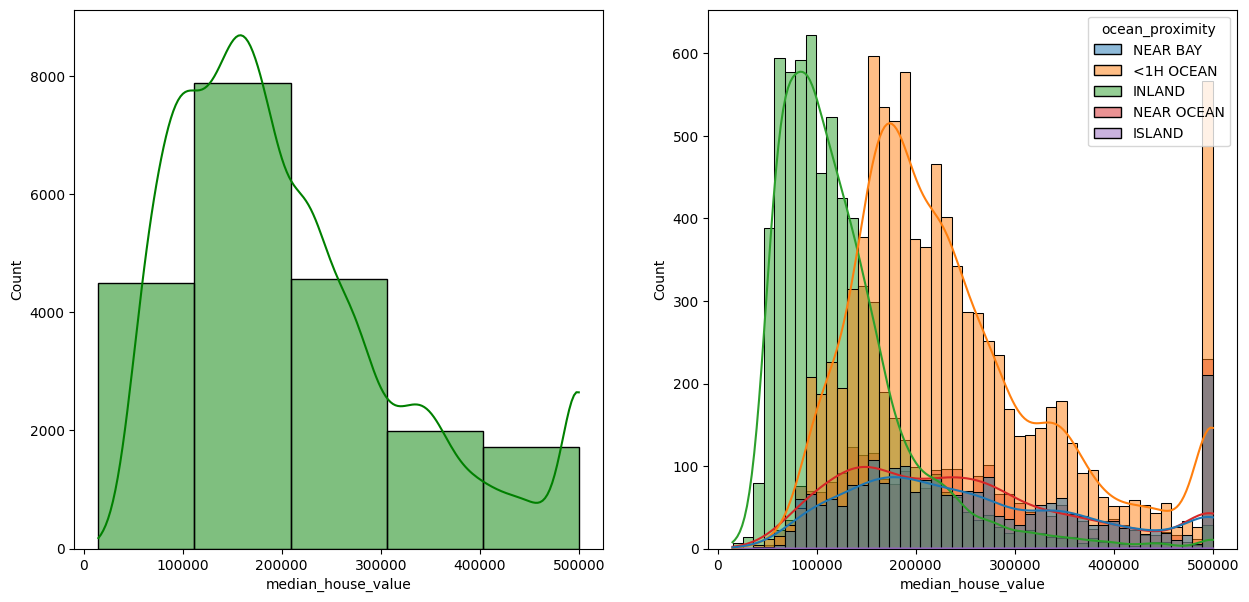

In [114]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='median_house_value',bins=5,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='median_house_value',kde=True,hue='ocean_proximity')
plt.show()

### Insights

- According to the data, most homes are priced between $100k and $200k.
- For houses far from the ocean, most median values fall between $40k and $150k.
- For houses located less than one hour from the ocean, most median values range between $90k and $300k.

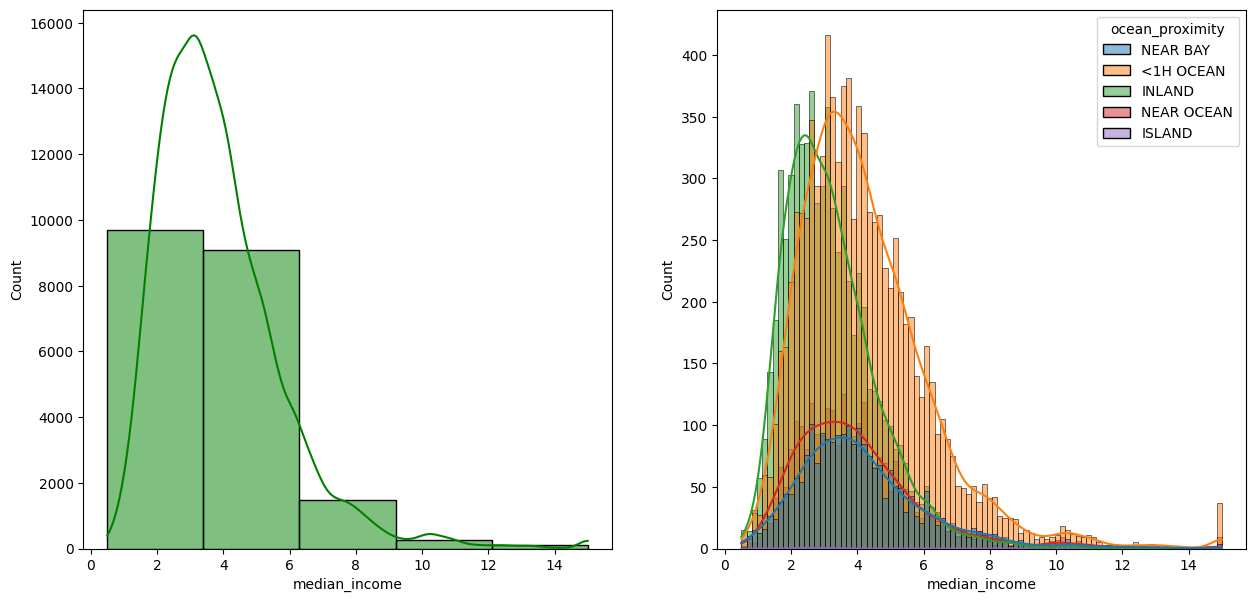

In [100]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='median_income',bins=5,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='median_income',kde=True,hue='ocean_proximity')
plt.show()

### Insights

- From the first graph, most households have a median income between $100k and $600k.
- The highest concentration of households is observed around a median income of slightly above $300k.

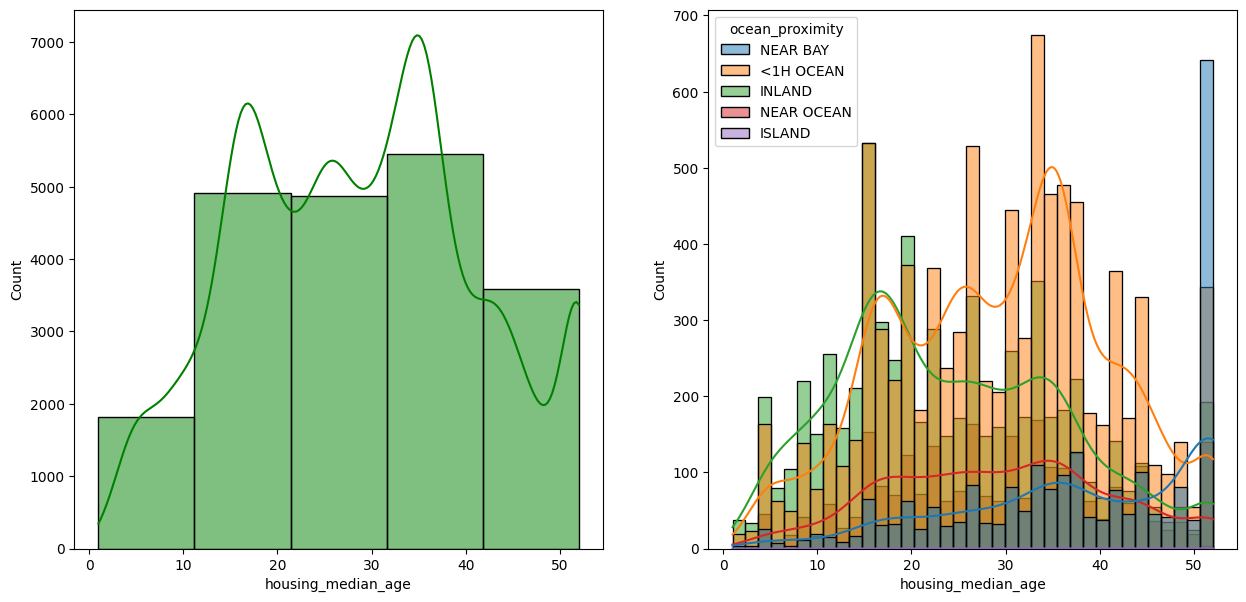

In [119]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='housing_median_age',bins=5,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='housing_median_age',kde=True,hue='ocean_proximity')
plt.show()

### Insights

- The highest concentration of housing median age is observed between 30 and 40 years.
- According to the data, most houses are under 30 years old, while relatively few fall below 10 years.
- Most houses located less than one hour from the ocean fall within the 14 to 36 years range.

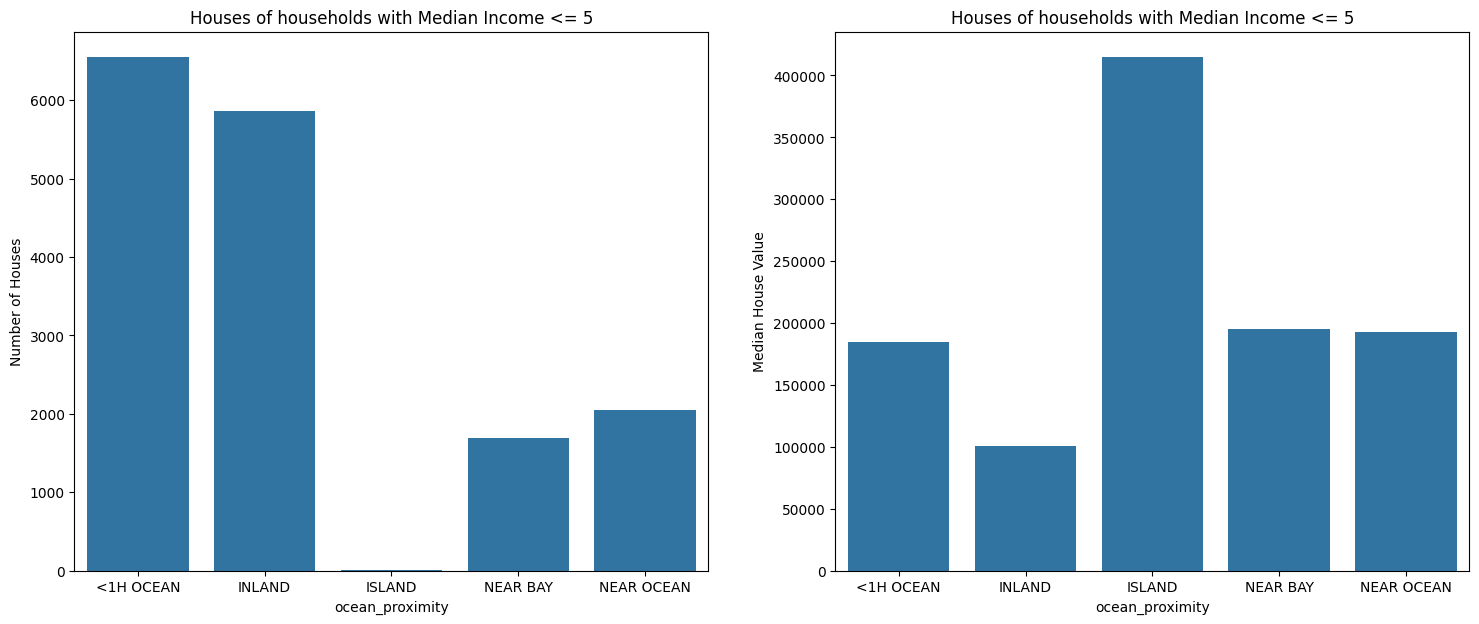

In [160]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7))
plt.subplot(121)
median_income_less_5_count = df[df['median_income'] <= 5].groupby('ocean_proximity')['median_house_value'].count()
sns.barplot(x=median_income_less_5_count.index, y=median_income_less_5_count.values)
plt.ylabel('Number of Houses')
plt.title('Houses of households with Median Income <= 5')
plt.subplot(122)
median_income_less_5 = df[df['median_income'] <= 5].groupby('ocean_proximity')['median_house_value'].median()
sns.barplot(x=median_income_less_5.index, y=median_income_less_5.values)
plt.ylabel('Median House Value')
plt.title('Houses of households with Median Income <= 5')
plt.show()

### Insights

- The data shows a sufficient number of observations for houses located less than one hour from the ocean and far from the ocean among households with incomes below $50k.
- For houses located less than one hour from the ocean, the median house value is approximately $180k.
- For houses located far from the ocean, the median house value is approximately $100k.

- Show maximum median income across categories
- Show minimum median income across categories
- Show minimum median house value across categories
- Show maximum median house value across categories
- Show minimum median house age across categories
- Show maximum median house age across categories

#### 4.3 Analysis of different categories using pieplot

(-1.25, 1.25, -1.25, 1.25)

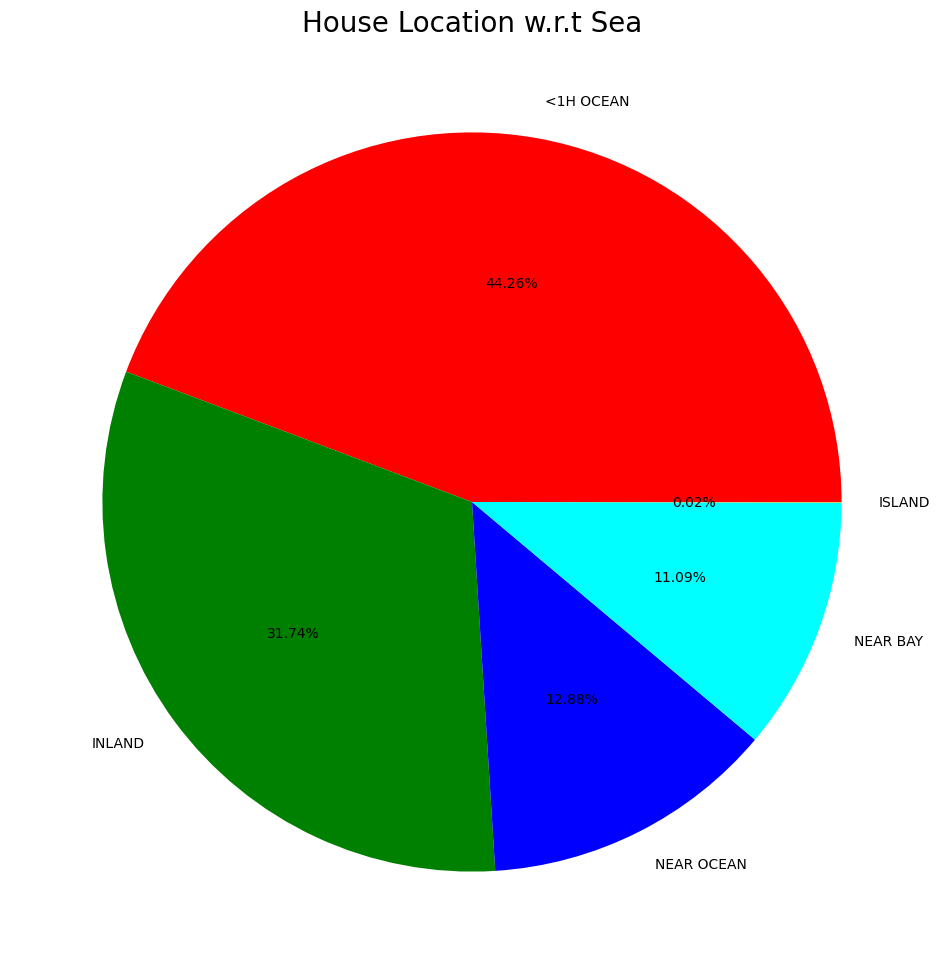

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

size = df['ocean_proximity'].value_counts()
labels = size.index
color = ['red', 'green', 'blue', 'cyan','orange']


plt.pie(size, colors = color, labels = labels,autopct = '%2.2f%%')
plt.title('House Location w.r.t Sea', fontsize = 20)
plt.axis('off')